# **Feature Extraction**

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

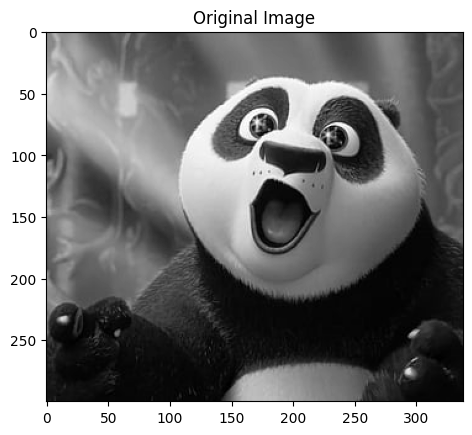

In [12]:
image = cv2.imread('/content/HD-wallpaper-po-impressed-hall-of-warriors-kung-fu-panda-thumbnail.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

**Inference**

Displayed the original image in grayscale

Converting color images to grayscale in computer vision and deep learning projects can be beneficial for several reasons:

1. **Reduced Complexity**: Color images have three channels (red, green, and blue), whereas grayscale images have only one. By converting to grayscale, you reduce the complexity of the data, which can make processing faster and more efficient.

2. **Dimensionality Reduction**: Grayscale images have a lower dimensionality compared to color images. This reduction in dimensionality can simplify the model architecture and reduce the number of parameters, which can help prevent overfitting and improve generalization.

3. **Invariant to Color**: Grayscale images are invariant to changes in color. This means that the model can focus more on learning features related to shapes, textures, and patterns rather than being influenced by variations in color that might not be relevant to the task at hand.

4. **Data Augmentation**: When working with limited data, converting color images to grayscale can effectively increase the size of your dataset. This can be particularly useful in scenarios where collecting large amounts of labeled data is difficult or expensive.

5. **Memory and Computational Efficiency**: Grayscale images require less memory and computational resources compared to color images. This can be especially important when working with large datasets or deploying models on resource-constrained devices like mobile phones or embedded systems.

However, it's important to note that converting to grayscale might not be suitable for all tasks. In some cases, color information might be crucial for the task at hand, such as in medical imaging or satellite imagery analysis.

# Point Detection

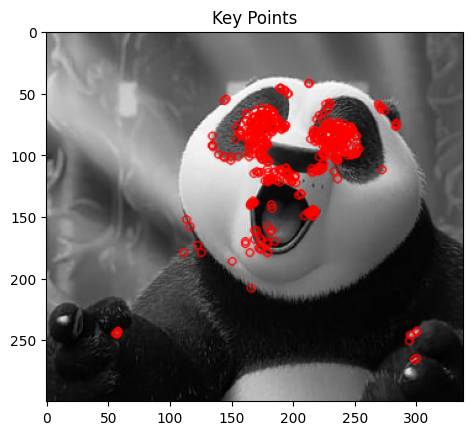

In [13]:
orb = cv2.ORB_create()                  #we create an ORB object using the cv2.ORB_create() function
keypoints = orb.detect(image, None)    
#The detect() function of the ORB object is used to detect keypoints in the input image. 
    #It takes two arguments: the image (image) and a mask (which is set to None in this case, indicating that no mask is used). 
    #After this line of code executes, keypoints will contain a list of KeyPoint objects representing the keypoints detected in the image.

keypoint_image = cv2.drawKeypoints(image, keypoints, None, color=(255,0,0), flags=0)
#The drawKeypoints() function is used to draw the detected keypoints on the input image. 
#It takes several arguments:
    # image: The input image on which keypoints are to be drawn.
    # keypoints: The list of keypoints detected in the image.
    # outImage: The output image where the keypoints will be drawn. Since None is passed here, the keypoints will be drawn directly on the input image.
    # color: The color of the keypoints. Here, it's set to red (255, 0, 0).
    # flags: Additional drawing options. In this case, it's set to 0, indicating default drawing options.

plt.imshow(keypoint_image)
plt.title('Key Points')
plt.show()

**Inference**

Detected key points in the image using ORB (Oriented fast and rotated brief). It is better than SIFT and SURF.

In summary, ORB is a feature detector and descriptor algorithm that combines the efficiency of FAST for key point detection with the robustness of BRIEF for feature description. Key points are important locations in an image that are identified by the detector and can be described by the descriptor for further analysis and processing in computer vision applications.These points are selected based on certain criteria such as their contrast, texture, or intensity compared to their surroundings. Key points are often used as landmarks for various computer vision tasks, including object recognition, image stitching, and 3D reconstruction.

Object recognition and tracking, Augmented Reality, Medical image analysis these are some of the applications of detecting key points from the image.

# Edge Detection

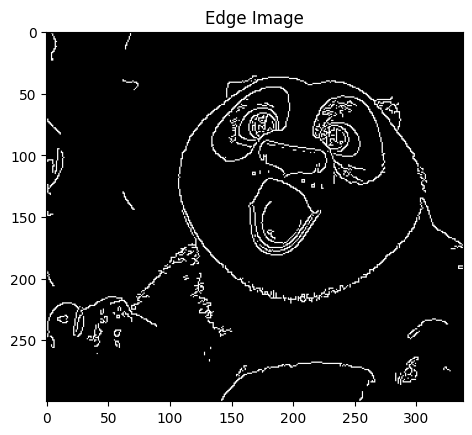

In [14]:
edges = cv2.Canny(image, 100, 200) # Upper and lower threshold
#100: This is the lower threshold for edge intensity gradients. Any gradient value below this threshold will be suppressed, 
    #meaning that only edges with gradient magnitudes greater than this value will be considered as potential edges. This threshold helps filter out noise.
#200: This is the upper threshold for edge intensity gradients. 
    #Any gradient value above this threshold will be considered as a strong edge pixel. Pixels with gradient magnitudes between the lower and upper thresholds are considered weak edges. 
    #Strong edges are more likely to be retained in the final edge map, while weak edges may or may not be retained based on their connectivity to strong edges.


plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.show()

**Inference**

Detected the edge feature of the image by using canny edge detection technique.

The output of the Canny edge detection algorithm is a binary edge map, where white pixels represent detected edges and black pixels represent the background. This edge map can be further processed or used as input for various computer vision tasks, such as object detection, image segmentation, and feature extraction.
Edge Detection involves identifying significant transitions in intensity in an image. These transitions corresponds to object boundaries, lines etc.

The Canny edge detection algorithm works in several steps:

Noise Reduction: The algorithm first applies a Gaussian blur to the input image to reduce noise and smooth out details. This step helps prevent false edge detections due to noise in the image.

Gradient Calculation: Next, it calculates the gradient magnitude and orientation at each pixel in the image. Typically, this is done using derivative filters such as the Sobel operator.

Non-maximum Suppression: The algorithm then performs non-maximum suppression to thin the edges. It considers each pixel and its neighboring pixels in the direction of the gradient orientation. If the pixel's gradient magnitude is not the maximum among its neighbors in the direction of the gradient, it is suppressed (set to zero). This step ensures that only local maxima in gradient magnitude are retained as potential edge pixels.

Edge Tracking by Hysteresis: Finally, the algorithm uses hysteresis thresholding to classify edge pixels as strong or weak. Pixels with gradient magnitudes above the upper threshold are classified as strong edges, while pixels with gradient magnitudes between the lower and upper thresholds are classified as weak edges. Weak edges are retained only if they are connected to strong edges along the edge contours. This helps prevent isolated noise pixels from being detected as edges.

# Line Detection

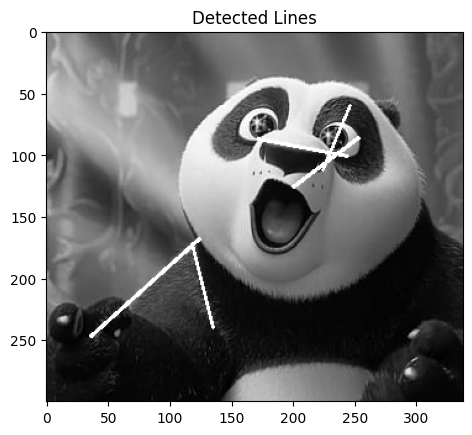

In [15]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)

line_image = image.copy()
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

#In this line of code, the Hough transform is applied to detect lines in the edge-detected image (edges). 
    #Here's what each parameter represents:
        #edges: The input image containing the edges, typically obtained from an edge detection algorithm like Canny.
        #1: The distance resolution of the accumulator in pixels. In this case, it's set to 1 pixel, which means the accumulator has the same resolution as the input image.
        #np.pi/180: The angle resolution of the accumulator in radians. It's set to pi/180 radians, which means angles are discretized in 1 degree increments.
        #threshold=50: The minimum number of votes (intersections in the Hough parameter space) required for a line to be detected. 
        #Increasing this value can reduce the number of detected lines by filtering out weaker lines.
        #minLineLength=50: The minimum length of a line in pixels. Lines shorter than this length will be rejected.
        #maxLineGap=10: The maximum allowed gap between line segments to be considered as a single line. If the gap between two segments is less than or equal to this value, they will be merged into a single line.
        #The cv2.HoughLinesP function returns a list of lines represented by endpoints (x1, y1) and (x2, y2).
    
#This loop iterates over each line detected by the Hough transform. 
    #For each line, it extracts the endpoints (x1, y1) and (x2, y2) and draws a line on the line_image using the cv2.line function. 
    #The line is drawn with a blue color (255, 0, 0) and a thickness of 2 pixels.
    #Finally, the line_image containing the detected lines is ready to be displayed or further processed. 
    #   This approach of overlaying detected lines on the original image helps visualize the results of the line detection algorithm.

plt.imshow(line_image, cmap='gray')
plt.title('Detected Lines')
plt.show()

**Inference**

Detected the lines by using HoughLines transform technique. Detecting lines involves identifying the structure or outline of objects within images by recognizing straight lines, which can be crucial for further analysis or processing.



Line detection can be useful in medical imaging, tracking road lanes etc.

Detecting horizontal and vertical lines using HoughLines Transform

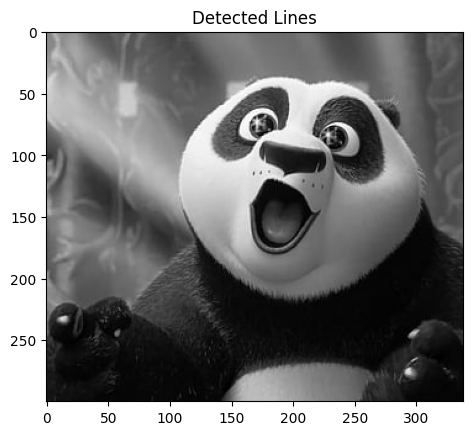

In [16]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)

line_image = image.copy()

tolerance = 10              #A tolerance value of 10 pixels is defined. 
                            #This tolerance will be used to distinguish between horizontal and vertical lines. 
                            #Lines with a horizontal orientation will have a small difference in y-coordinates between their endpoints, 
                                #while lines with a vertical orientation will have a small difference in x-coordinates.

for line in lines:
    x1, y1, x2, y2 = line[0]
    if abs(y2 - y1) < tolerance:  # Horizontal line
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    elif abs(x2 - x1) < tolerance:  # Vertical line
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
#This loop iterates over each line detected by the Hough transform, extracting the coordinates of the endpoints (x1, y1) and (x2, y2) of each line.
#Here, it checks if the absolute difference between y2 and y1 (the y-coordinates of the line's endpoints) is less than the tolerance value. 
        #If this condition is true, it means the line is close to horizontal. In this case, the line is drawn in blue (255, 0, 0) using cv2.line.
        #If the above condition is false, it means the line is not horizontal, so it checks if the absolute difference between x2 and x1 (the x-coordinates of the line's endpoints) is less than the tolerance value. 
        #If this condition is true, it means the line is close to vertical. In this case, the line is drawn in green (0, 255, 0) using cv2.line.

plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.show()

This approach allows you to distinguish between horizontal and vertical lines based on their orientations and visualize them with different colors on the line_image. Adjusting the tolerance value allows you to control the sensitivity of the classification.

Detecting Angles

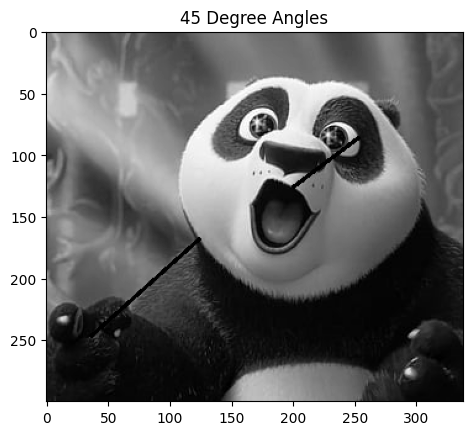

In [17]:
def line_angle(x1, y1, x2, y2):
    return np.degrees(np.arctan2(y2 - y1, x2 - x1))

angle_image = image.copy()                  #This function line_angle calculates the angle of a line given its endpoints (x1, y1) and (x2, y2). 
                                            #It uses the np.arctan2 function to calculate the angle in radians and then converts it to degrees using np.degrees. 
                                            #The angle is measured counterclockwise from the positive x-axis.
for line in lines:
    x1, y1, x2, y2 = line[0]
    angle = line_angle(x1, y1, x2, y2)
    if abs(angle - 45) <= 10 or abs(angle + 45) <= 10:
        cv2.line(angle_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

#This loop iterates over each line detected by the Hough transform. For each line, it calculates the angle using the line_angle function. 
#Then, it checks if the absolute difference between the calculated angle and 45 degrees is less than or equal to 10 degrees, 
        #or if the absolute difference between the calculated angle and -45 degrees is less than or equal to 10 degrees. 
        #This condition checks if the line is approximately 45 degrees from the horizontal.
        #If the condition is true, meaning the line is approximately at a 45-degree angle from the horizontal, 
        #the line is drawn on the angle_image in green (0, 255, 0) using the cv2.line function with a thickness of 2 pixels.

plt.imshow(angle_image, cmap='gray')
plt.title('45 Degree Angles')
plt.show()

**Inference**

Detected the angles in respective degrees.

# **Conclusion**

Thus the task to extract feature descriptors from the image has been implemented successfully. Extracted features like edges, lines and points etc. Used detection techniques like ORB for points detection and canny for edge detection. Used HoughLineTransform for line detection.